In [102]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns

In [95]:
df = pd.read_csv("/Users/gabrielgilling/Documents/GitHub/Bayesian-Blogs/Bayesian-Blogs/selected_features_model_df_2018_sprint3.csv")

In [96]:
df.head()

,acs_key,median_hh_income,median_hh_income_margin,owner_occupied_margin,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,...,abs_change_count_above_0_8_income,pct_change_count_above_0_8_income,abs_change_count_below_08_income,abs_change_prop_no_bachelors,abs_change_prop_owner_occupied,pct_change_prop_owner_occupied,abs_change_prop_renter_occupied,abs_change_owner_occupied,pct_change_owner_occupied,abs_change_renter_occupied
0,"Census Tract 7523.03, Frederick County, Maryla...",110048.0,10314.0,72,78,48,131,112,127,148,...,-623,-0.258185,-7,0.019703,0.005389,0.018249,0.030714,-168,-0.209476,58
1,"Census Tract 7525.01, Frederick County, Maryla...",97298.0,7839.0,90,180,89,130,172,232,248,...,101,0.023139,-163,0.015364,-0.023893,-0.078606,0.022555,-138,-0.092184,108
2,"Census Tract 7525.02, Frederick County, Maryla...",92083.0,8881.0,39,46,26,39,91,98,190,...,32,0.014376,-117,-0.001218,0.004536,0.014015,-0.012523,-16,-0.020151,-34
3,"Census Tract 7526.01, Frederick County, Maryla...",123800.0,10358.0,125,85,64,143,122,140,279,...,-79,-0.022501,-87,-0.039303,0.019814,0.061430,-0.006133,25,0.020408,-31
4,"Census Tract 7526.02, Frederick County, Maryla...",89766.0,20938.0,74,58,121,58,79,53,78,...,-43,-0.018511,-85,-0.012565,0.018267,0.052772,-0.018821,6,0.006601,-57


In [97]:
df.columns

Index(['acs_key', 'median_hh_income', 'median_hh_income_margin',
       'owner_occupied_margin', 'B01001_011E', 'B01001_012E', 'B01001_013E',
       'B01001_014E', 'B01001_015E', 'B01001_016E', 'B01001_017E',
       'B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E',
       'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E',
       'B01001_035E', 'B01001_036E', 'B01001_037E', 'B01001_038E',
       'B01001_039E', 'B01001_040E', 'B01001_041E', 'B01001_042E',
       'B01001_043E', 'B01001_044E', 'B01001_045E', 'B01001_046E',
       'B01001_047E', 'B01001_049E', 'avg_home_value_margin',
       'median_gross_rent_margin', 'income_more_than_200000',
       'income_more_than_200000_margin', 'cbsa', 'fips', 'prop_vacant_hh',
       'neighborhood_change', 'current_PBV', 'current_HCV',
       'current_hcv_percent_occupied', 'hcv_change_12_months',
       'hcv_change_24_months', 'pbv_change_12_months',
       'hcv_rate_change_24_months', 'hcv_rate_change_12_months',
       'pbv_ra

In [98]:
df['is_gentrifying'] =  np.where(df.neighborhood_change == 'gentrifying', 1, 0)

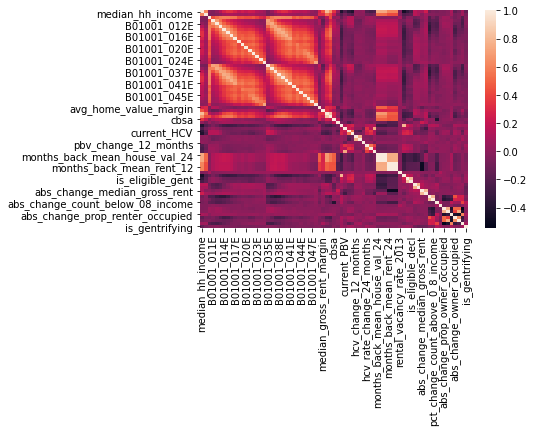

In [116]:
sns.heatmap(df.corr());

In [105]:
corr_df = df.corr()

In [115]:
corr_df[abs(corr_df) > 0.8]

,median_hh_income,median_hh_income_margin,owner_occupied_margin,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,B01001_017E,...,pct_change_count_above_0_8_income,abs_change_count_below_08_income,abs_change_prop_no_bachelors,abs_change_prop_owner_occupied,pct_change_prop_owner_occupied,abs_change_prop_renter_occupied,abs_change_owner_occupied,pct_change_owner_occupied,abs_change_renter_occupied,is_gentrifying
median_hh_income,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_hh_income_margin,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner_occupied_margin,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01001_011E,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01001_012E,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
abs_change_prop_renter_occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
abs_change_owner_occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pct_change_owner_occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
abs_change_renter_occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [69]:
X = df.drop(["acs_key", 'fips', 'neighborhood_change', 'is_gentrifying'], axis = 1)
y = df['is_gentrifying']

In [70]:
num_cbsa = len(df.cbsa.unique())
cbsa_values = df.cbsa.values

In [71]:
df.groupby(['cbsa', 'is_gentrifying'])[X.columns].mean()

median_hh_income  median_hh_income_margin  \
cbsa  is_gentrifying                                              
10420 0                   53807.398773              7772.245399   
      1                   32553.000000              6345.142857   
12580 0                   76166.180365             11460.312024   
      1                   44261.769231             10095.884615   
16740 0                   59886.281553              9314.541748   
      1                   38888.791667              7420.083333   
17460 0                   51764.859677              8250.541935   
      1                   31647.277778              6321.611111   
39580 0                   74239.612440             10172.894737   
      1                   46589.333333              6633.733333   
40060 0                   63372.722028              9372.201049   
      1                   43713.444444              8632.555556   
47900 0                  101892.803788             13629.379167   
      1                   57492.205128              9896.384615   
49660 0                   42058.313725              6257.869281   
      1                   16841.500000              5724.000000   

                      owner_occupied_margin  B01001_011E  B01001_012E  \
cbsa  is_gentrifying                                                    
10420 0                          115.441718   135.920245   121.441718   
      1                           77.571429    95.142857   101.428571   
12580 0                          102.286149   148.022831   138.633181   
      1                           98.807692   121.192308   115.192308   
16740 0                          117.770874   145.714563   149.139806   
      1                          109.833333   126.750000   128.708333   
17460 0                           91.306452    98.853226    95.366129   
      1                           78.500000    81.222222    95.666667   
39580 0                          137.119617   191.325359   196.320574   
      1                          123.200000   167.266667   166.400000   
40060 0                          109.548951   147.356643   143.895105   
      1                           83.111111   167.888889   167.666667   
47900 0                          100.949242   164.093939   169.321970   
      1                           94.230769   162.025641   181.384615   
49660 0                          104.104575   102.379085    96.222222   
      1                          107.500000    56.500000   102.500000   

                      B01001_013E  B01001_014E  B01001_015E  B01001_016E  \
cbsa  is_gentrifying                                                       
10420 0                113.349693   127.840491   138.159509   153.153374   
      1                 72.285714    67.571429    82.428571    77.000000   
12580 0                121.118721   126.779300   137.896499   148.570776   
      1                102.615385    83.500000   104.807692   124.500000   
16740 0                146.858252   165.844660   161.588350   153.027184   
      1                117.208333   128.125000   110.541667   146.458333   
17460 0                 90.756452    97.291935   106.835484   118.164516   
      1                 74.777778    74.222222    83.722222   100.611111   
39580 0                208.545455   211.066986   208.282297   194.430622   
      1                169.800000   168.333333   157.400000   174.333333   
40060 0                131.968531   138.968531   145.860140   153.465035   
      1                174.888889   117.333333   120.777778   122.555556   
47900 0                157.081818   158.587121   158.581061   158.903030   
      1                133.794872   123.384615   119.435897   123.846154   
49660 0                 98.372549   103.575163   115.189542   129.196078   
      1                104.500000    82.500000    68.500000    86.000000   

                      B01001_017E  ...  abs_change_count_above_0_8_income  \
cbsa  is_gentrifying               ...                

In [72]:
df.groupby(['cbsa'])['is_gentrifying'].value_counts()

cbsa   is_gentrifying
10420  0                  163
       1                    7
12580  0                  657
       1                   26
16740  0                  515
       1                   24
17460  0                  620
       1                   18
39580  0                  209
       1                   15
40060  0                  286
       1                    9
47900  0                 1320
       1                   39
49660  0                  153
       1                    2
Name: is_gentrifying, dtype: int64

In [73]:
with pm.Model() as no_pooling_model:
    #Fit a unique intercept for each cbsa, note the shape parameter!
    alpha_j = pm.Normal("alpha_j", mu = 0, sd = 2.5, shape = num_cbsa)

    p_j = pm.math.invlogit(alpha_j[cbsa_values])

    g_likelihood = pm.Binomial('g_likelihood', n = sim_data['Ni'], p = p_j, observed = sim_data['Si'])

IndexError: index 47900 is out of bounds for size 8

In [75]:
preds = '+'.join(list(X.drop(['cbsa'], axis = 1).columns))

In [83]:
form = "is_gentrifying ~" + preds + " + (1|cbsa)"

In [84]:
form

'is_gentrifying ~median_hh_income+median_hh_income_margin+owner_occupied_margin+B01001_011E+B01001_012E+B01001_013E+B01001_014E+B01001_015E+B01001_016E+B01001_017E+B01001_018E+B01001_019E+B01001_020E+B01001_021E+B01001_022E+B01001_023E+B01001_024E+B01001_025E+B01001_035E+B01001_036E+B01001_037E+B01001_038E+B01001_039E+B01001_040E+B01001_041E+B01001_042E+B01001_043E+B01001_044E+B01001_045E+B01001_046E+B01001_047E+B01001_049E+avg_home_value_margin+median_gross_rent_margin+income_more_than_200000+income_more_than_200000_margin+prop_vacant_hh+current_PBV+current_HCV+current_hcv_percent_occupied+hcv_change_12_months+hcv_change_24_months+pbv_change_12_months+hcv_rate_change_24_months+hcv_rate_change_12_months+pbv_rate_change_12_months+months_back_mean_house_val_24+months_back_mean_house_val_12+current_mean_house_val+months_back_mean_rent_24+months_back_mean_rent_12+current_mean_rent+rental_vacancy_rate_2013+prop_vacant_hh_2013+is_eligible_gent+is_eligible_decl+abs_change_avg_home_value+pct_c

In [85]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(
        form, df, family=pm.glm.families.Binomial()
    )
    trace = pm.sample(1000, tune=1000, init="adapt_diag")

/Users/gabrielgilling/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1 | cbsa, abs_change_renter_occupied, pct_change_owner_occupied, abs_change_owner_occupied, abs_change_prop_renter_occupied, pct_change_prop_owner_occupied, abs_change_prop_owner_occupied, abs_change_prop_no_bachelors, abs_change_count_below_08_income, pct_change_count_above_0_8_income, abs_change_count_above_0_8_income, pct_change_median_gross_rent, abs_change_median_gross_rent, pct_change_avg_home_value, abs_change_avg_home_value, prop_vacant_hh_2013, rental_vacancy_rate_2013, current_mean_rent, months_back_mean_rent_12, months_back

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1162 seconds.
There were 886 divergences after tuning. Increase `target_accept` or reparameterize.
There were 822 divergences after tuning. Increase `target_accept` or reparameterize.
There were 962 divergences after tuning. Increase `target_accept` or reparameterize.
There were 877 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [88]:
with logistic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.22,0.85,-3.04,0.17,0.05,0.04,272.57,272.57,274.15,298.84,1.02
is_eligible_gent[T.True],0.77,0.73,-0.58,2.12,0.05,0.04,229.68,203.36,242.55,277.89,1.01
is_eligible_decl[T.True],-0.04,0.72,-1.34,1.34,0.05,0.03,231.42,231.42,245.81,272.45,1.01
median_hh_income,-0.00,0.00,-0.00,0.00,0.00,0.00,288.84,288.84,287.39,584.38,1.02
median_hh_income_margin,0.00,0.00,-0.00,0.00,0.00,0.00,312.37,267.25,316.94,303.24,1.01
...,...,...,...,...,...,...,...,...,...,...,...
abs_change_prop_renter_occupied,11.89,7.84,-2.01,26.89,0.65,0.47,145.78,140.45,146.45,340.29,1.02
abs_change_owner_occupied,0.00,0.00,-0.00,0.01,0.00,0.00,152.69,152.69,153.91,385.54,1.02
pct_change_owner_occupied,-6.05,2.43,-10.60,-1.58,0.18,0.14,173.39,157.90,180.05,249.32,1.03
abs_change_renter_occupied,0.00,0.00,-0.00,0.01,0.00,0.00,139.08,139.08,138.80,330.18,1.02
